# Datu Mehatzaritza

## Zer da datuen mehatzaritza

![title](data/data-mining-in-python-700x525.jpg)

Makinen ikaskuntza eta analisi estatistikoa erabiltzen datu-multzo handien ereduak, patroiak eta beste informazio baliotsu batzuk agerian usteko. Datu-baseetan jakintza deskubrimendu bezala ere ezagutzen da KDD alegia.

Jarraitu beharreko pausoak ondorengoak lirateke:

    1. Helburuak ezarri
    2. Datuak hautatu/aukeratu
    3. Datuak prestatu
    4. Modeloak sortu edo/eta patroiak bilatu
    5. Emaitzak ebaluatu eta aztertu

    

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib as rcParams

In [7]:
df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Balio nuloei begirada bat botako diegu

In [8]:
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [9]:
Zein datu mota ditugu DataFramean?

Object `DataFramean` not found.


In [10]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Datu hauek analisirako prestatuta daude jada. Hau ez da ohikoa izango zuek analisiak egin behar dituzuenean. Ondoren dtauen forma aztertzea izango da garrantzitsua.

In [11]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Hemen berehala ikusten ditugu zenbat datu erregistro ditugun 

Text(0.5, 1.0, 'Historigram of Housing Prices')

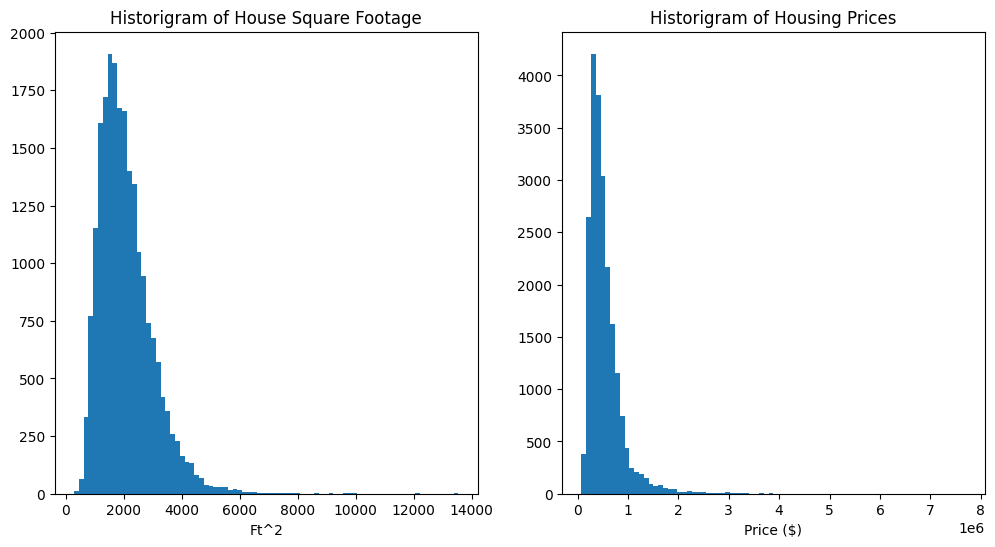

In [12]:
fig = plt.figure(figsize=(12, 6))
sqft = fig.add_subplot(121)
cost = fig.add_subplot(122)

sqft.hist(df.sqft_living, bins=80)
sqft.set_xlabel('Ft^2')
sqft.set_title("Historigram of House Square Footage")

cost.hist(df.price, bins=80)
cost.set_xlabel('Price ($)')
cost.set_title("Historigram of Housing Prices")

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# OLS Erregresioaren Emaitzak - Azalpena

## R-karratua eta Egokitutako R-karratua
- **R-karratua**: 0.493
  - **49.3%** "price" aldagaiaren (salmenta-prezioa) aldaera azaltzen duela modeloak. Hau da, erregresioak salmenta-prezioaren aldaeraren erdia baino gutxiago azaltzen du.
  - **Egokitutako R-karratua** 0.493 da, eta horrek adierazten du modeloak **egokitu** egin dela, kontuan hartuta aldagai kopurua.

## F-estatistikoa eta Prob(F-statistikoa)
- **F-estatistikoa**: 21,000
- **Prob (F-statistikoa)**: 0.000
  - F-estatistikoa oso handia da (21,000), eta horrek adierazten du modeloak **ahalmen handia duela salmenta-prezioaren aldaera azaltzeko**.
  - Prob (F-statistikoa) balioa 0.000 da, eta horrek adierazten du modelo **esanguratsua** dela, hau da, kasualitatea ez dela.

## Koefizienteak
- **Intersektzioa**: -43,580
  - Interceptzioak adierazten du, **sqft_living** (bizitokiaren azalera) eta beste aldagai guztiak zero balioak diren bitartean, salmenta-prezioa **-43,580** izango dela. Balio hau praktikan ez du zentzurik, izan ere, etxebizitzaren azalerak normalean zero ez dira izango.

- **sqft_living (bizitokiaren azalera, metro koadroetan)**: 280.6236
  - Honek adierazten du, etxebizitzaren **azalera** handitzen den heinean, **280.62 unitate** (adibidez, dolar edo beste moneta) igoko dela salmenta-prezioa metro koadro bakoitzeko.

## T-test eta P-balioak (t, P>|t|)
- **t-test** eta **P>|t|**: P-balioak (0.000) adierazten dute **sqft_living** aldagaiak salmenta-prezioa azaltzeko **esanguratsua** dela.
  - Koefizientea **esanguratsua** da, eta horrek esan nahi du, etxebizitzaren azalerak **garrantzi handia** duela salmenta-prezioaren inguruan.

## Omnibus Test, Skew eta Kurtosis
- **Omnibus test**: 14,832.490 eta **Prob (Omnibus)**: 0.000
  - Omnibus test batek **normaltasunaren aurkako froga** egiten du erroreen banaketa aztertuz. Honek adierazten du erroreak ez direla **normalak**, eta horrek posible den beste arazo batzuk adieraz dezake modeloan.
  
- **Skew**: 2.824
  - **Skew** balio positiboa da, eta hori adierazten du banaketa **desorekatuta** dagoela. Skew positiboa denean, banaketa **eskuinean luzatuta** dago (tail-a eskuinera) eta balio altuak gehiago agertzen dira.

- **Kurtosis**: 26.977
  - **Kurtosis** balio handia (26.977) da, eta honek adierazten du errore-banaketa **zulo txikiko** eta **muturreko balio altuekin** dagoela, hau da, datuak **baldintza normala baino gehiago kontzentratuta** daude muturreko aldeetan.

## Jarque-Bera Test
- **Jarque-Bera (JB)**: 546,444.713 eta **Prob(JB)**: 0.000
  - **Jarque-Bera testak** normaltasunaren aurkako froga egiten du eta, kasu honetan, p-balioak 0.000 dira, honek adierazten du **erroreak ez direla normaltasunarekin bat** eta erroreak **normalak ez direla**.

## Durbin-Watson Test
- **Durbin-Watson**: 1.983
  - Durbin-Watson testak adierazten du **autokorelaziorik ez** dagoela erroreen artean. Hori positiboa da, izan ere, errore bakoitza besteekin lotuta ez dagoela esan nahi du.

## Multikolinealtasunaren Arriskua
- **Cond. No.**: 5,630
  - Kondizio-kopurua (cond. no.) altua da (5,630), eta hori **multikolinealtasun**aren seinale izan daiteke. Multikolinealtasuna adierazten du aldagai batzuk elkarren artean **gehiegi lotuta daudela**, eta horrek erregresioaren zehaztasuna murriztu dezake.

## Covariance Type
- **Covariance Type**: nonrobust
  - **Covariance tipoa** "nonrobust" da, hau da, errore-estimazioak **robust** ez direla, eta errorearen zirkunstantziak normala ez badira, errore-estimazioak **murriztuta** egon daitezke. Hau aldatu daiteke **robust** estimazioak erabiliz.


In [14]:
m = ols('price ~ sqft_living', df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        08:31:40   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      

In [15]:
m = ols('price ~ sqft_living + bedrooms + grade + condition', df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     6749.
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        08:31:40   Log-Likelihood:            -2.9884e+05
No. Observations:               21613   AIC:                         5.977e+05
Df Residuals:                   21608   BIC:                         5.977e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.398e+05   1.81e+04    -40.855      

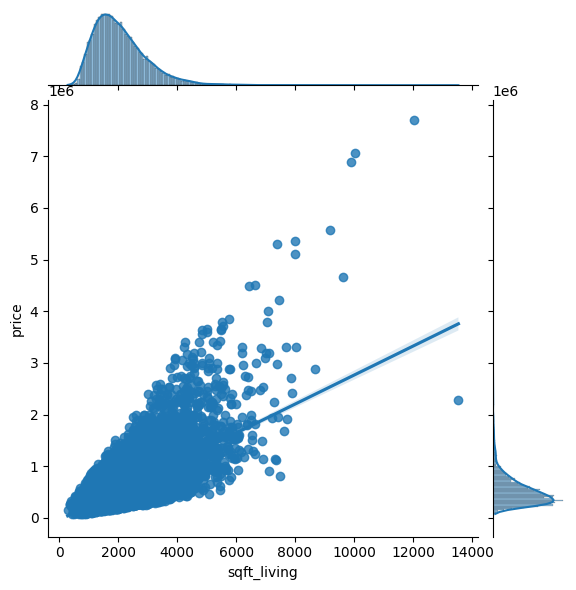

In [16]:
sns.jointplot(x="sqft_living", y="price", data=df, kind='reg', fit_reg=True)
plt.show()

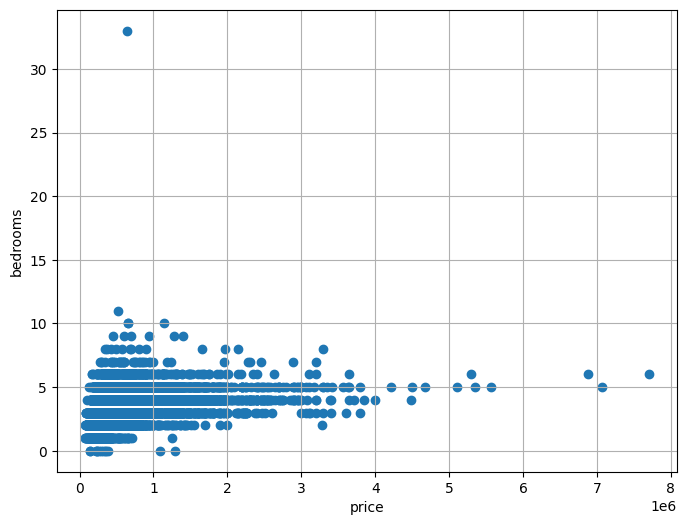

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(df['price'],df['bedrooms'])
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.grid(True)
plt.show()